In [1]:
import numpy as np
import pylab as plt
%matplotlib inline
import json

In [2]:
import sys
sys.path.append('../../')
from frb_periodicity.search import riptide_search, p4j_search
from frb_periodicity.utils import get_phase

In [3]:
with open('121102_data.json', 'r') as f:
    r1_data = json.load(f)
burst_dict = r1_data['bursts']

all_bursts = []
for k in burst_dict.keys():
    all_bursts += burst_dict[k]

In [4]:
all_bursts = np.array(all_bursts)
all_bursts = np.sort(all_bursts - np.min(all_bursts))

In [5]:
unique_days = np.unique(np.round(all_bursts))

# Searching for period with narrowest folded profile (Rajwade et al 2020)

In [12]:
cont_frac, p = riptide_search(all_bursts, pmin=2*24*60*60, pmax=2*365*(24*60*60))

2020-06-04 16:01:58,038 - riptide_search -root - WARNING - Period/nbins should be greater than tsamp. Not all periods in the given range are valid. Selecting the valid periods for search.
100%|██████████| 25129/25129 [00:24<00:00, 1022.03it/s]
2020-06-04 16:02:22,630 - riptide_search -root - INFO - Max continuous fraction without data is 0.425 at a period of 156.00773908236596 days


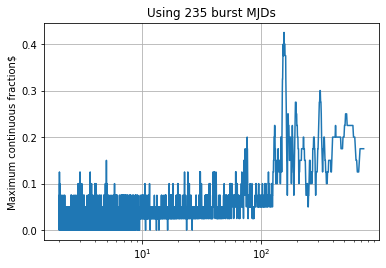

In [14]:
plt.plot(p/(24*60*60), cont_frac)
plt.ylabel(r'Maximum continuous fraction$')
plt.title(f'Using {len(all_bursts)} burst MJDs')
plt.grid()
plt.xscale('log')

In [15]:
cont_frac_uniq, p = riptide_search(unique_days, pmin=2*24*60*60, pmax=2*365*(24*60*60))

2020-06-04 16:03:40,634 - riptide_search -root - WARNING - Period/nbins should be greater than tsamp. Not all periods in the given range are valid. Selecting the valid periods for search.
100%|██████████| 25128/25128 [00:24<00:00, 1006.07it/s]
2020-06-04 16:04:05,614 - riptide_search -root - INFO - Max continuous fraction without data is 0.425 at a period of 156.00285753163698 days


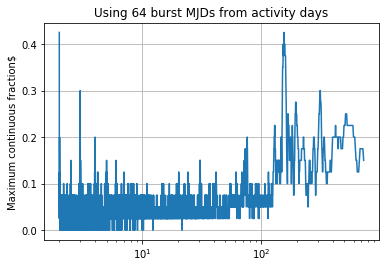

In [16]:
plt.plot(p/(24*60*60), cont_frac_uniq)
plt.ylabel(r'Maximum continuous fraction$')
plt.title(f'Using {len(unique_days)} burst MJDs from activity days')
plt.xscale('log')
plt.grid()

#### Looks like we can recover the period reported by Rajwade et al (2020). Cool. 

# Using P4J
### using QMI based on Euclidean distance for periodogram. See https://github.com/phuijse/P4J

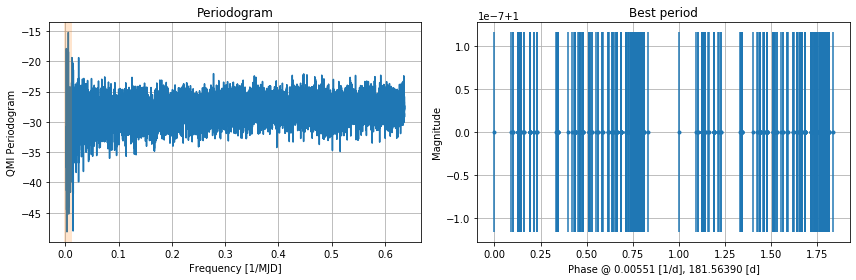

In [17]:
periodogram, _p = p4j_search(all_bursts, pmin=1.57, pmax=3.14*200, plot=True, save=False)

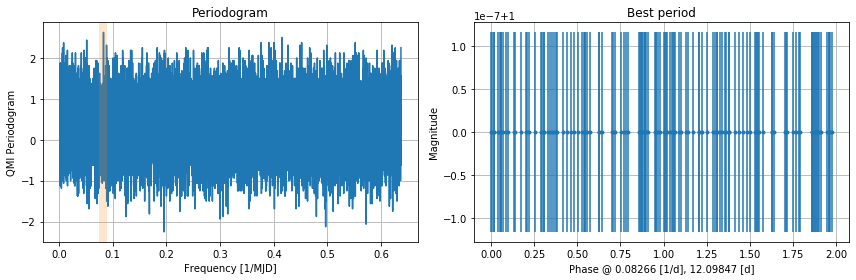

In [18]:
periodogram, _p = p4j_search(unique_days, pmin=1.57, pmax=3.14*200, plot=True, save=False)